In [45]:
# Dependencies
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import scipy.stats as sts

In [2]:
# Files to load
city_df = pd.read_csv("Resources/city_data.csv")
ride_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
print(city_df.head())
print(ride_df.head())

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344


In [5]:
pyber_data_df = pd.merge(ride_df,city_df,on='city')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [6]:
# Get cities type Series
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2019-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2019-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2019-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2019-04-07 23:42:07,10.79,1615474447641,9,Rural


In [7]:
# Get ride count series
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [8]:
# Get average fare for each city Series.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [9]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

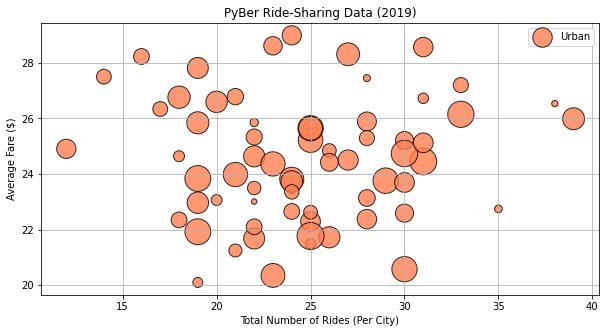

In [10]:
plt.figure(figsize=(10,5))

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

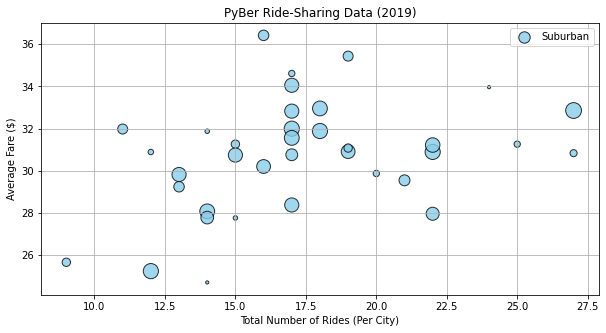

In [11]:
plt.figure(figsize=(10,5))

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

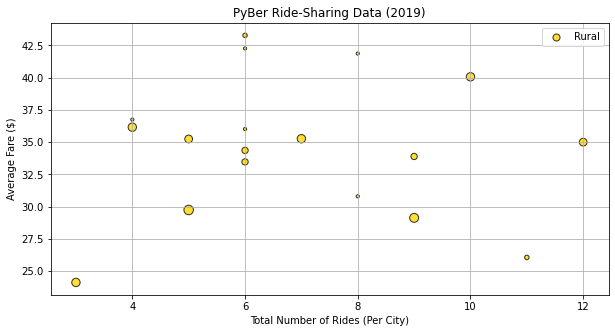

In [12]:
plt.figure(figsize=(10,5))

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

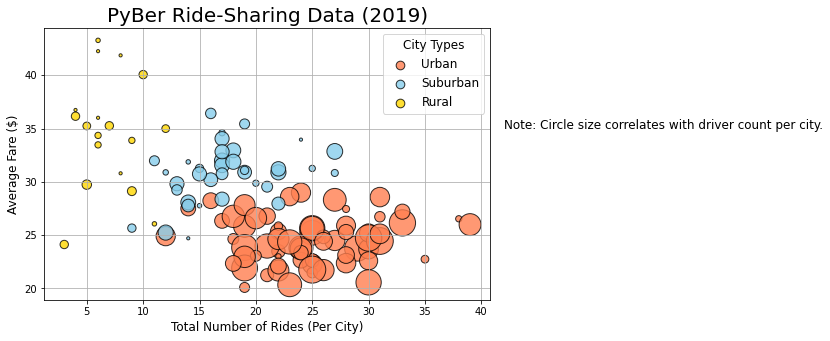

In [13]:
plt.figure(figsize=(8,5))

# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")


In [14]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [15]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [16]:
urban_ride_count.median()

24.0

In [17]:
suburban_ride_count.mode()

0    17
dtype: int64

In [18]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [19]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [21]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [23]:
# Get the fares
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]


In [24]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [25]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [26]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [27]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0    5
1    5
2    5
3    5
4    5
Name: driver_count, dtype: int64

In [28]:
# Calculate the measures of central tendency for the average fare for the urban drivers.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean fare price for urban trips is ${mean_urban_drivers:.2f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median fare price for urban trips is ${median_urban_drivers:.2f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode fare price for urban trips is {mode_urban_drivers}.")

The mean fare price for urban trips is $36.68.
The median fare price for urban trips is $37.00.
The mode fare price for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [29]:
# Calculate the measures of central tendency for the average fare for the suburban drivers.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean fare price for urban trips is ${mean_suburban_drivers:.2f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median fare price for urban trips is ${median_suburban_drivers:.2f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode fare price for urban trips is {mode_suburban_drivers}.")

The mean fare price for urban trips is $13.71.
The median fare price for urban trips is $16.00.
The mode fare price for urban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [30]:
# Calculate the measures of central tendency for the average fare for the rural drivers.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean fare price for urban trips is ${mean_rural_drivers:.2f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median fare price for urban trips is ${median_rural_drivers:.2f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode fare price for urban trips is {mode_rural_drivers}.")

The mean fare price for urban trips is $4.30.
The median fare price for urban trips is $4.00.
The mode fare price for urban trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


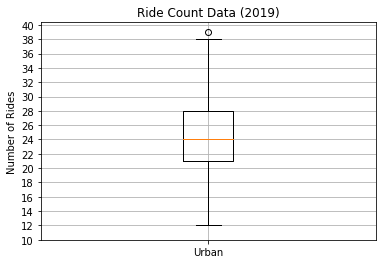

In [32]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [33]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

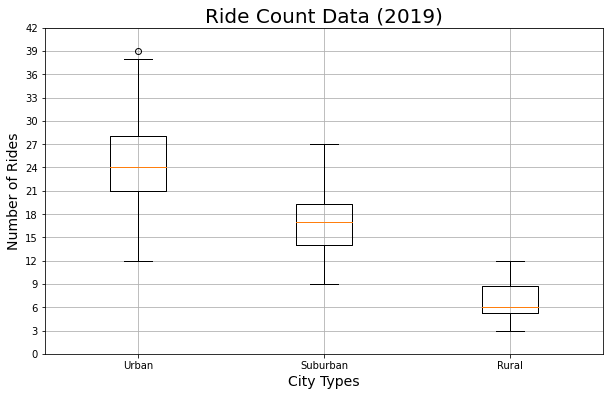

In [34]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [35]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


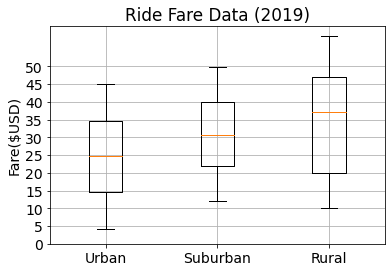

Summary Statistics


In [47]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fares_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("Analysis/Fig3.png")
plt.show()
print("Summary Statistics")


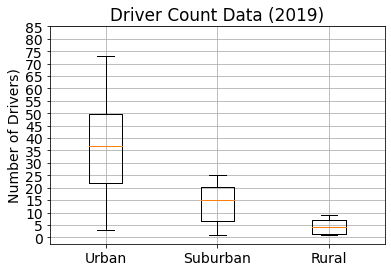

Summary Statistics


In [48]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots()
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("Analysis/Fig4.png")
plt.show()
print("Summary Statistics")


In [49]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [50]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [51]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [52]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

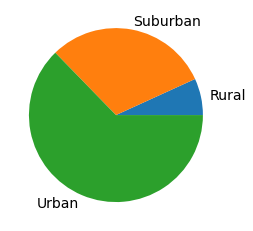

In [53]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

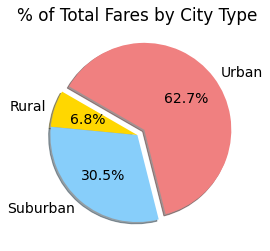

In [54]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

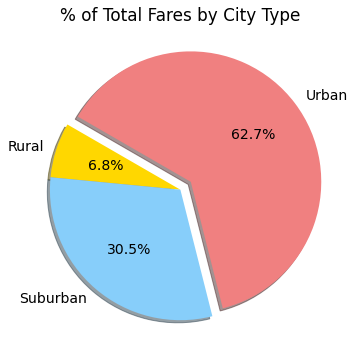

In [55]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/Fig5.png")
# Show Figure
plt.show()

In [59]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

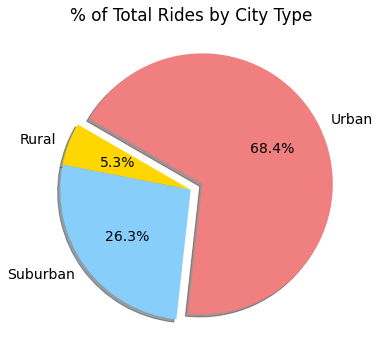

In [60]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [62]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_df.groupby(["type"]).sum()["driver_count"] / city_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

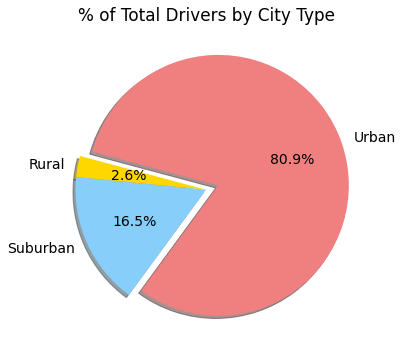

In [63]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()